# Oscar Dominguez
# Date 5/26/2023
# Explaining Models with Shap

**Project 1 Revisited - Part 2: Global Explanations**

Load Your Saved Joblib File

- Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
- In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
- Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

**Explain your tree-based model with shap:**

- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer,
- Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':
    - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
Are they the same features in both? If not, what's different?
    - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
- Create a second summary plot - with plot_type='dot'
    - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

In [31]:
# Loading functions from Project_1_Revisited.ipynb 
from ipynb.fs.full.Project_1_Revisited import evaluate_regression
from ipynb.fs.full.Project_1_Revisited import get_importances, plot_importance_color
from ipynb.fs.full.Project_1_Revisited import plot_importance

In [2]:
import joblib
loaded = joblib.load('Data/random_forest_l01.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'LinearRegression', 'preprocessor', 'RandomForest'])

In [3]:
# Getting valuea from saved joblib and saving to attributes
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_joblib = loaded['RandomForest']

Training Data:	R^2= 0.94	RMSE= 431.49
Test Data:	R^2= 0.55	RMSE= 1115.76


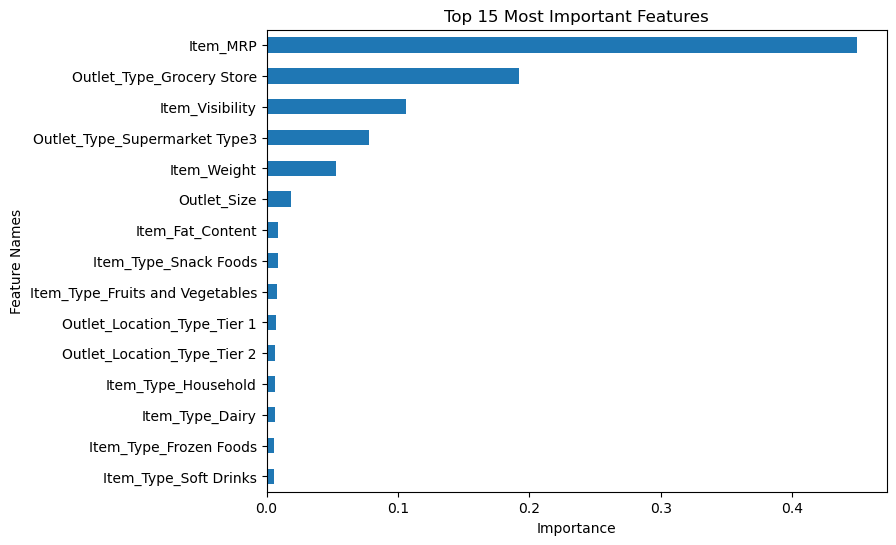

In [4]:
# Displaying scores and plotting importances
evaluate_regression(loaded_joblib,X_train_df, y_train, X_test_df,y_test)
loaded_importances = get_importances(loaded_joblib)
plot_importance_color(loaded_importances,top_n=15,color_dict=None);


# Preparing Data for Shap

In [5]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [6]:
len(X_train_df)

6392

In [7]:
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,0.70,1.35,0.87,-1.68,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
2497,0.52,1.35,0.42,1.28,-1.29,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
7723,1.09,-0.74,-0.99,0.68,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
8117,-0.50,-0.74,-0.32,1.62,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
7475,0.50,-0.74,-0.41,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [8]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

3888     759.01
2497     663.14
7723   2,766.40
8117   1,225.07
7475   1,685.81
         ...   
292    1,379.54
3035   2,956.15
6832   1,259.69
8455   4,206.52
7795     605.88
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [9]:
explainer = shap.Explainer(loaded_joblib)
explainer


In [10]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [11]:
X_shap.shape

(400, 28)

In [12]:
shap_values.shape

(400, 28)

In [13]:
shap_values[0]

.values =
array([ 8.61867252e+00,  7.57413529e+00,  2.47011392e+00, -1.65909289e+03,
       -6.43599800e+00, -1.51301105e+00, -6.28921991e-01, -1.13869395e+00,
       -5.64347635e-01,  9.82506666e-01,  1.23746787e+01, -1.95269775e+00,
       -1.66465739e+00, -6.61507657e+00,  3.12142317e-01, -5.12777988e-01,
       -5.22052913e-01, -1.52148786e+00, -1.14473594e+00, -1.71451649e+00,
        4.22009189e-01, -5.51176122e+00,  4.39888391e+00,  1.80042820e+00,
        1.65604293e+02,  8.88432596e+00,  1.04857830e+01, -9.08810519e+01])

.base_values =
array([2211.93481346])

.data =
array([ 0.6986536 ,  1.35076614,  0.87325195, -1.67713926,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ])

In [14]:
## Pandas
import pandas as pd
pd.DataFrame(shap_values.values, columns = X_shap.columns)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,8.62,7.57,2.47,"-1,659.09",-6.44,-1.51,-0.63,-1.14,-0.56,0.98,...,-1.14,-1.71,0.42,-5.51,4.40,1.80,165.60,8.88,10.49,-90.88
1,-134.86,-30.33,-260.74,818.57,-133.27,-4.96,-1.81,-3.90,-0.86,2.12,...,-21.81,-17.13,0.27,-72.44,-66.60,2.96,289.18,6.28,13.69,-256.23
2,3.12,-43.13,9.28,792.85,-43.15,-8.30,-0.38,-7.00,-14.60,-6.10,...,-10.91,-4.11,-10.66,-35.96,-15.98,-0.37,297.77,9.32,12.34,-198.97
3,-205.50,-17.43,-430.22,"1,197.31",-114.88,-3.50,-0.73,-4.25,-1.04,12.93,...,-25.46,-8.77,-2.05,-38.46,-35.76,-2.54,304.28,9.24,15.09,-258.53
4,33.71,-11.62,-108.50,-293.78,-33.06,-1.34,-0.27,-0.07,-2.96,2.78,...,-20.76,3.30,0.19,5.62,-4.95,-3.77,227.23,15.80,6.20,-194.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-105.94,-43.11,-190.22,330.77,-69.13,-4.28,5.02,-8.16,-4.95,-5.76,...,-4.82,-11.27,-12.32,-36.08,-17.87,-8.68,244.24,3.09,-5.44,-222.73
396,66.42,17.25,117.87,-41.25,1.24,-2.05,-0.14,-0.75,-3.09,-2.25,...,73.36,-0.71,-0.59,0.04,-6.07,-5.20,248.85,-65.96,-25.61,-140.57
397,4.66,-9.30,-31.28,-426.07,-25.18,-1.92,-2.28,-1.15,-0.61,-0.23,...,-13.36,-1.83,-0.73,-11.47,-4.30,-27.10,213.58,-121.54,-86.92,-157.27
398,250.69,2.90,167.17,592.24,15.57,2.02,-0.02,2.05,81.22,18.19,...,1.61,11.12,1.07,8.26,55.16,20.00,308.37,10.77,9.24,-155.74


# Create a summary plot - with plot_type='bar':

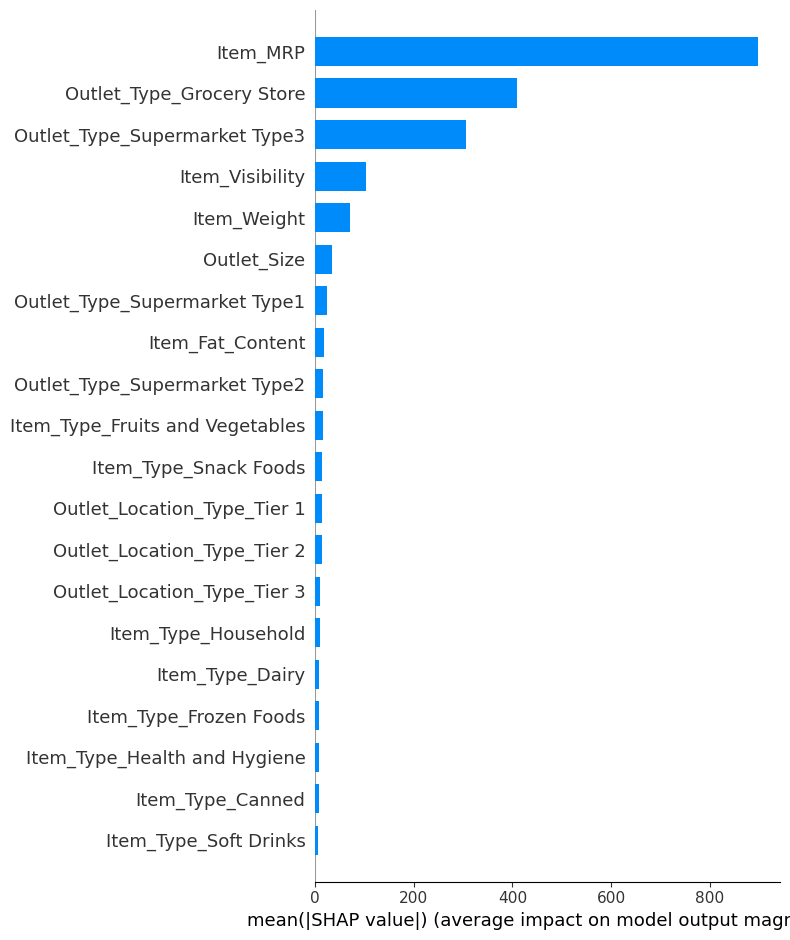

In [15]:
# SHAP plot
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')


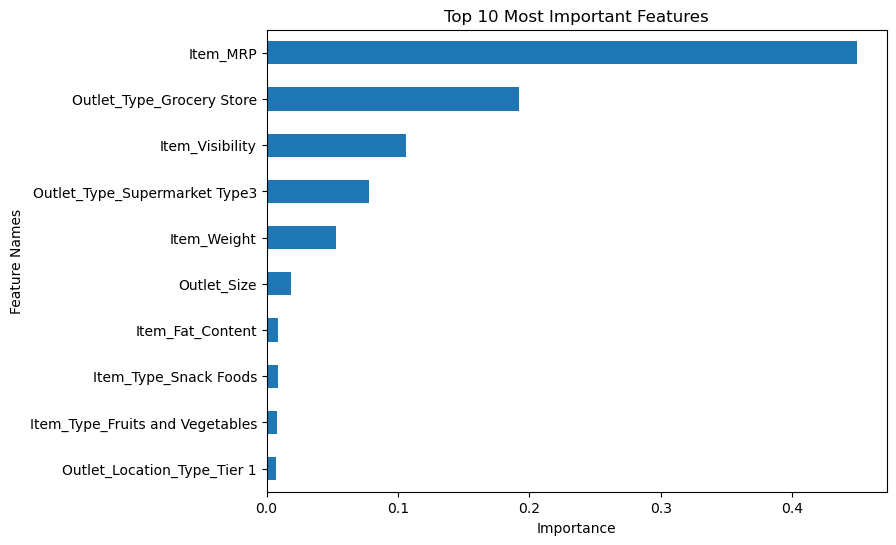

In [16]:
# Plotting feature imporatance
plot_importance(loaded_importances,top_n=10);

In [17]:
from sklearn.inspection import permutation_importance
r = permutation_importance(loaded_joblib,X_train_df,y_train,n_jobs=-1,n_repeats=5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [18]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [19]:
## getting the colors for the top 7 important rf features
colors_rf = get_color_dict(loaded_importances,top_n=7)


In [20]:
## can make the mean importances into a series
rf_perm_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'permutation importance')
rf_perm_importances = rf_perm_importances.sort_values(ascending=False)


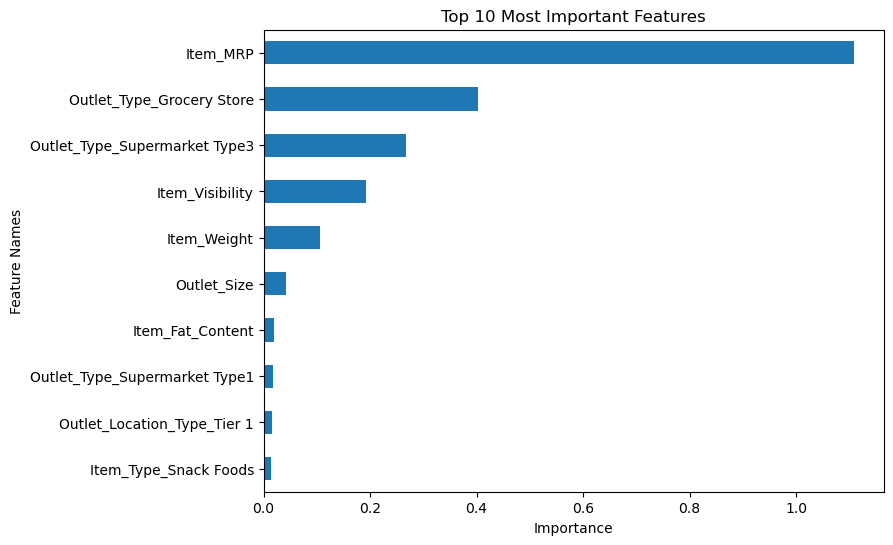

In [21]:
# Plotting permutation imporatance
plot_importance(rf_perm_importances,top_n=10);

## Question (graphs above) - display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances. Are they the same features in both? If not, what's different? 

**Answer: They are very similiar except for Item_Visibility and Outlet_Type_Supermarket Type 3 were in reverse order.**

# Create a second summary plot - with plot_type='dot'
- In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
- Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


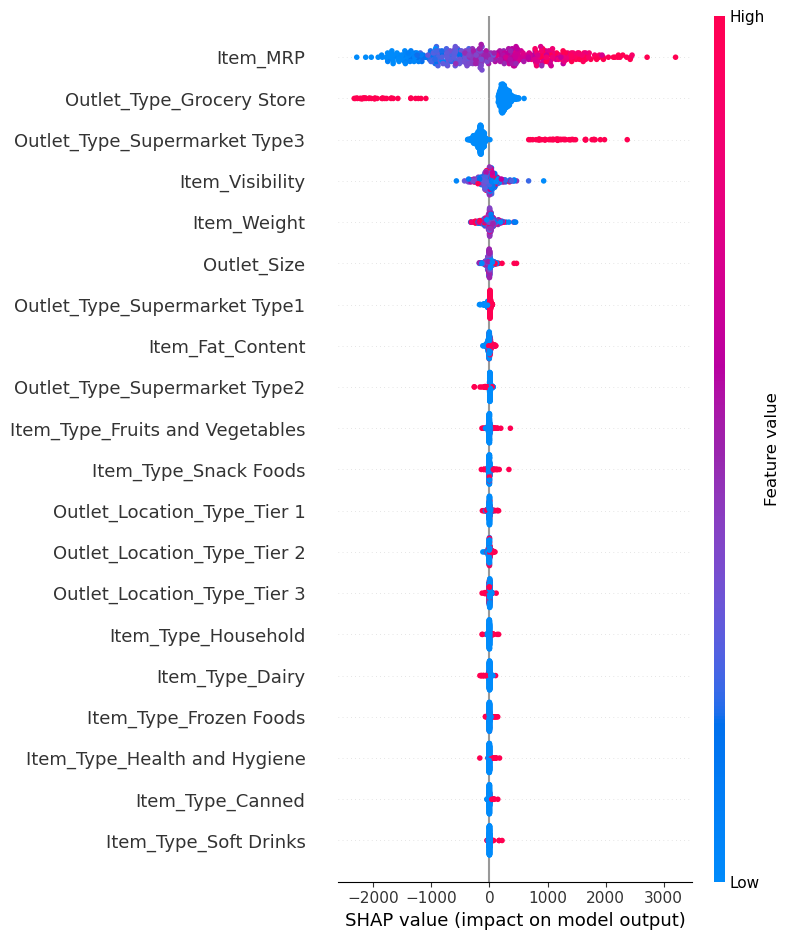

In [22]:
shap.summary_plot(shap_values,X_shap)

## Top 3 most important features and how they influence your model's predictions - Item_MRP, Outlet_Type_Grocery Store and Outlet_Type_Supermarket Type3.

- Item_MRP: the higher the value the more of a positive impact it had on the prediction
- Outlet_Type_Grocery Store: higher values had a negative impact
- Outlet_Type_Supermarket Type3: higher values had a positive impact

# Local Explanations
- Select at least 2 example rows/outlets based on the insights gained from your previous core assignments this week.
- Explain why you selected the examples that you did.
If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).

**For each example, produce :**
- **a Lime tabular explanation**
    - Interpret what features most heavily influenced the predictions, according to LIME.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the lime explanation.
    
- **an Individual Force Plot**
    - Interpret what features most heavily influenced the predictions, according to SHAP.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the individual force plot.
    
##  2 example rows/outlets - 
- I selected columns Item_MRP and Outlet_Type_Grocery Store columns based on the feature importance graph above.

<AxesSubplot: xlabel='Item_MRP', ylabel='Count'>

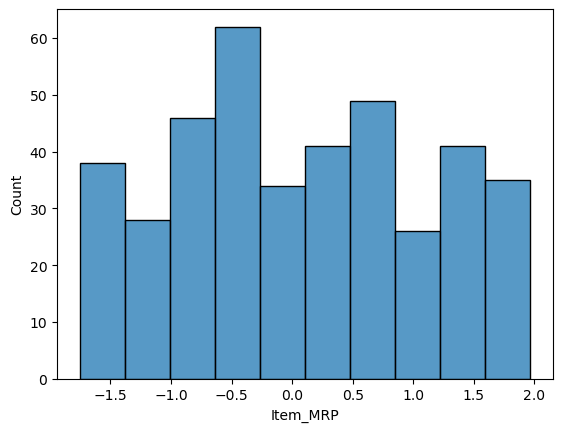

In [30]:
import seaborn as sns
sns.histplot(X_shap['Item_MRP'])

<AxesSubplot: xlabel='Outlet_Type_Grocery Store', ylabel='Count'>

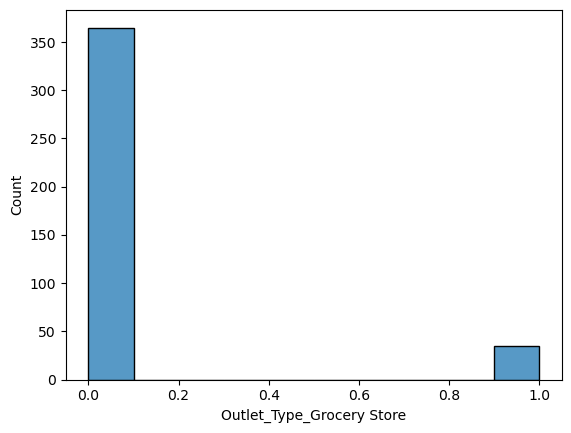

In [24]:
import seaborn as sns
sns.histplot(X_shap['Outlet_Type_Grocery Store'])


## SHAP Individual Force Plot 

In [25]:
# Getting higest value for Item_MRP to show row number
X_shap.sort_values(by='Item_MRP', ascending=False)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
47,-0.69,-0.74,-0.78,1.97,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
4144,1.65,-0.74,-1.19,1.97,2.11,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
6934,0.38,1.35,-0.04,1.94,0.41,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
5177,0.00,1.35,0.18,1.93,0.41,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3890,-0.21,-0.74,-1.29,1.92,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7706,-0.26,1.35,0.22,-1.70,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
3699,1.15,-0.74,0.15,-1.71,0.41,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3699,1.15,-0.74,0.15,-1.71,0.41,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3373,-0.90,-0.74,-0.53,-1.73,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [26]:
# Selecting a row with higest value for Item_MRP 
row = 47
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 47
- Target: 1677.816


Item_Weight                        0.00
Item_Fat_Content                   1.35
Item_Visibility                   -0.00
Item_MRP                          -0.96
Outlet_Size                        0.41
Item_Type_Baking Goods             0.00
Item_Type_Breads                   0.00
Item_Type_Breakfast                0.00
Item_Type_Canned                   0.00
Item_Type_Dairy                    0.00
Item_Type_Frozen Foods             0.00
Item_Type_Fruits and Vegetables    0.00
Item_Type_Hard Drinks              0.00
Item_Type_Health and Hygiene       0.00
Item_Type_Household                0.00
Item_Type_Meat                     0.00
Item_Type_Others                   0.00
Item_Type_Seafood                  0.00
Item_Type_Snack Foods              0.00
Item_Type_Soft Drinks              0.00
Item_Type_Starchy Foods            1.00
Outlet_Location_Type_Tier 1        0.00
Outlet_Location_Type_Tier 2        0.00
Outlet_Location_Type_Tier 3        1.00
Outlet_Type_Grocery Store          0.00


In [27]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])


## Features most heavily influenced the predictions according to SHAP are Outlet_Type_Supermarket Type3  and Item_MRP

## LIME tabular explanation

In [28]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [29]:
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               loaded_joblib.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


## Features most heavily influenced the predictions according to LIME are Outlet_Type_Grocery Store, Item_MRP and Outlet_Type_Supermarket Type3 